# Statistiques descriptives

In [63]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt

In [64]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

# 1 - Comportement d'achat

In [65]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - Purchasing behaviour.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    tickets_kpi = pd.read_csv(file_in, sep=",")

In [66]:
tickets_kpi.head()

customer_id  event_type_id  nb_tickets  nb_purchases  total_amount  \
0            1              2      384226        194790     2686540.5   
1            1              4      453242        228945     3248965.5   
2            1              5      201750        107110     1459190.0   
3            1              6      217356        111786     1435871.5   
4            2              2         143           143           0.0   

   nb_suppliers  vente_internet_max  purchase_date_min  purchase_date_max  \
0             7                   1        3262.190868           4.179306   
1             6                   1        3698.198229           5.221840   
2             6                   1        3803.369792           0.146331   
3             5                   1        2502.715509        1408.715532   
4             1                   0        2041.274549        1340.308160   

   time_between_purchase  nb_tickets_internet          name_event_types  \
0            3258.011562                 51.0  offre muséale individuel   
1            3692.976389               2988.0          spectacle vivant   
2            3803.223461                  9.0      offre muséale groupe   
3            1093.999977                  5.0          formule adhésion   
4             700.966389                  0.0  offre muséale individuel   

   avg_amount  
0    6.150659  
1    7.762474  
2    4.452618  
3    6.439463  
4    6.150659

In [67]:
tickets_kpi.columns

Index(['customer_id', 'event_type_id', 'nb_tickets', 'nb_purchases',
       'total_amount', 'nb_suppliers', 'vente_internet_max',
       'purchase_date_min', 'purchase_date_max', 'time_between_purchase',
       'nb_tickets_internet', 'name_event_types', 'avg_amount'],
      dtype='object')

In [68]:
# Présence d'outlier
tickets_kpi.sort_values(by = ['nb_tickets'], axis = 0, ascending = False).head(10)

customer_id  event_type_id  nb_tickets  nb_purchases  total_amount  \
1                1              4      453242        228945     3248965.5   
0                1              2      384226        194790     2686540.5   
3                1              6      217356        111786     1435871.5   
2                1              5      201750        107110     1459190.0   
5032          6733              6       14208           114           0.0   
5029          6733              2       11656           158         471.0   
5030          6733              4        7440           162           0.0   
60              41              6        6583           634       12546.5   
57              41              2        6514           812       22423.0   
36376        63488              4        5750             9       63250.0   

       nb_suppliers  vente_internet_max  purchase_date_min  purchase_date_max  \
1                 6                   1        3698.198229           5.221840   
0                 7                   1        3262.190868           4.179306   
3                 5                   1        2502.715509        1408.715532   
2                 6                   1        3803.369792           0.146331   
5032              3                   1        2492.187199        1442.405116   
5029              3                   1        2982.237384         489.495324   
5030              2                   1        1036.392674         426.201944   
60                4                   1        2501.337905        1409.370521   
57                6                   1        3576.106609         247.232697   
36376             1                   1         887.298484         440.265162   

       time_between_purchase  nb_tickets_internet          name_event_types  \
1                3692.976389               2988.0          spectacle vivant   
0                3258.011562                 51.0  offre muséale individuel   
3                1093.999977                  5.0          formule adhésion   
2                3803.223461                  9.0      offre muséale groupe   
5032             1049.782083              13497.0          formule adhésion   
5029             2492.742060               9815.0  offre muséale individuel   
5030              610.190729               7419.0          spectacle vivant   
60               1091.967384               6391.0          formule adhésion   
57               3328.873912               5321.0  offre muséale individuel   
36376             447.033322               5750.0          spectacle vivant   

       avg_amount  
1        7.762474  
0        6.150659  
3        6.439463  
2        4.452618  
5032     6.439463  
5029     6.150659  
5030     7.762474  
60       6.439463  
57       6.150659  
36376    7.762474

In [69]:
# Part du CA par customer
total_amount_share = tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']

total_amount_share_index = total_amount_share.set_index('customer_id')
df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)


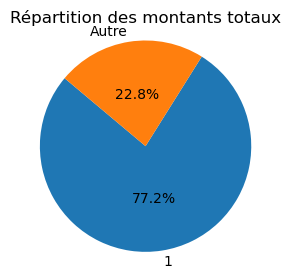

In [70]:
# Costumer 1 vs others customers
coupure = 1

top = df_circulaire[:coupure]
rest = df_circulaire[coupure:]

# Calculez la somme du reste
rest_sum = rest.sum()

# Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])

# Créez le graphique circulaire
plt.figure(figsize=(3, 3))
plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
plt.axis('equal')  # Assurez-vous que le graphique est un cercle
plt.title('Répartition des montants totaux')
plt.show()


In [71]:
tickets_kpi_filtered  = tickets_kpi[tickets_kpi['customer_id'] != 1]

# 2 - Comportement d'achat bis (Alexis)

In [72]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - customer_event.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    customer = pd.read_csv(file_in, sep=",")

print(customer.shape)
customer.head()

(156289, 41)


customer_id birthdate  street_id  is_partner  gender  is_email_true  \
0            1       NaN          2       False       2           True   
1            1       NaN          2       False       2           True   
2            1       NaN          2       False       2           True   
3            1       NaN          2       False       2           True   
4            2       NaN          2       False       1           True   

   opt_in  structure_id profession language  ...  purchase_date_min  \
0   False           NaN        NaN      NaN  ...        3262.190868   
1   False           NaN        NaN      NaN  ...        2502.715509   
2   False           NaN        NaN      NaN  ...        3698.198229   
3   False           NaN        NaN      NaN  ...        3803.369792   
4    True           NaN        NaN      NaN  ...        1705.261192   

  purchase_date_max  time_between_purchase  nb_tickets_internet  \
0          4.179306            3258.011562                 51.0   
1       1408.715532            1093.999977                  5.0   
2          5.221840            3692.976389               2988.0   
3          0.146331            3803.223461                  9.0   
4       1456.333715             248.927477                  0.0   

           name_event_types  avg_amount  nb_categories  nb_campaigns  \
0  offre muséale individuel    6.150659           14.0           NaN   
1          formule adhésion    6.439463            9.0           NaN   
2          spectacle vivant    7.762474            9.0           NaN   
3      offre muséale groupe    4.452618            5.0           NaN   
4          formule adhésion    6.439463            1.0           4.0   

   nb_campaigns_opened  time_to_open  
0                  NaN           NaN  
1                  NaN           NaN  
2                  NaN           NaN  
3                  NaN           NaN  
4                  NaN           NaN  

[5 rows x 41 columns]

In [73]:
# Remove customer 1 as outlier

customer = customer[customer['customer_id']!=1]

In [74]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'nb_purchases', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet',
       'name_event_types', 'avg_amount', 'nb_categories', 'nb_campaigns',
       'nb_campaigns_opened', 'time_to_open'],
      dtype='object')

In [88]:
achat = ['customer_id', 'average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns',
         'nb_campaigns_opened']

customer_achat = customer[achat].drop_duplicates(subset = ['customer_id'])
customer_achat['nb_campaigns'] = customer_achat['nb_campaigns'].fillna(0)
customer_achat['nb_campaigns_opened'] = customer_achat['nb_campaigns_opened'].fillna(0)
customer_achat = customer_achat.fillna(0)
customer_achat.head()

customer_id  average_price  average_purchase_delay  average_price_basket  \
4             2       0.000000                0.000000              0.000000   
6             3      18.333333               30.666667             36.666667   
7             4      10.250000                5.000000             20.500000   
9             5       9.500000                0.000000             19.000000   
10            6      15.000000                1.000000             30.000000   

    average_ticket_basket  purchase_count  total_price  nb_campaigns  \
4                     1.0             307          0.0           4.0   
6                     2.0               3        110.0         222.0   
7                     2.0               2         41.0           7.0   
9                     2.0               1         19.0           4.0   
10                    2.0               1         30.0          20.0   

    nb_campaigns_opened  
4                   0.0  
6                 124.0  
7                   7.0  
9                   0.0  
10                  0.0

In [89]:
customer_achat[['average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns', 'nb_campaigns_opened']].describe()

average_price  average_purchase_delay  average_price_basket  \
count  151865.000000           151865.000000         151865.000000   
mean        5.252070             -206.581486             11.451596   
std         7.915955             2996.743657             48.271194   
min         0.000000           -44863.000000              0.000000   
25%         0.000000                0.000000              0.000000   
50%         0.000000                0.000000              0.000000   
75%        11.000000                0.000000             19.000000   
max       320.000000             1914.000000           9900.000000   

       average_ticket_basket  purchase_count    total_price   nb_campaigns  \
count          151865.000000   151865.000000  151865.000000  151865.000000   
mean                1.723372        0.655148      16.994064      40.923241   
std                 7.045950        5.694038     313.099102      70.445724   
min                 0.000000        0.000000       0.000000       0.000000   
25%                 0.000000        0.000000       0.000000       2.000000   
50%                 0.000000        0.000000       0.000000       5.000000   
75%                 2.000000        1.000000      20.000000      32.000000   
max               900.000000     1508.000000   64350.000000     439.000000   

       nb_campaigns_opened  
count        151865.000000  
mean              7.870681  
std              23.119061  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               3.000000  
max             434.000000

# 3 - Event

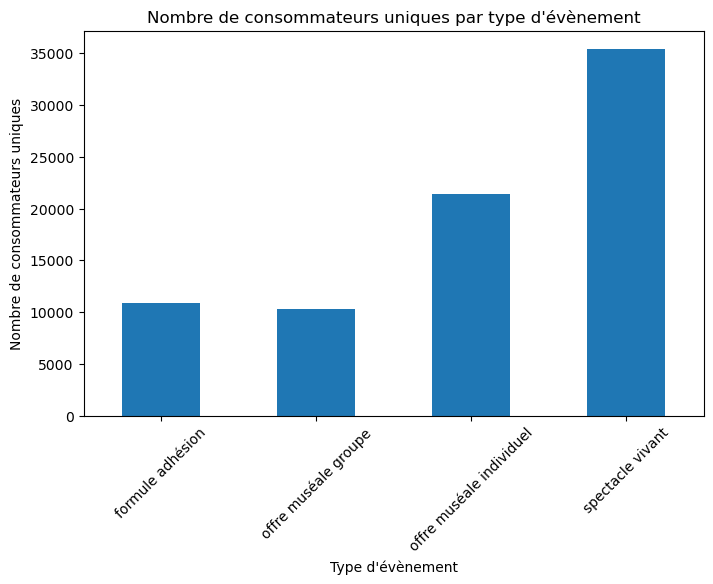

In [77]:
# Nombre de consommateurs uniques par type d'évènement

event_counts = customer.groupby('name_event_types')['customer_id'].nunique()

event_counts.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de consommateurs uniques')
plt.title("Nombre de consommateurs uniques par type d'évènement")
plt.xticks(rotation=45)
plt.show()

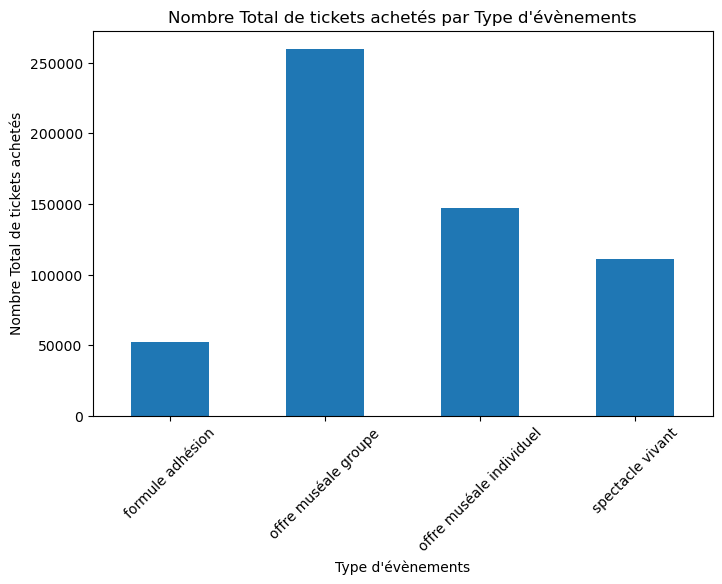

In [78]:
# Nombre Total de tickets achetés par Type d'évènements

total_tickets_by_event = customer.groupby('name_event_types')['nb_tickets'].sum()

total_tickets_by_event.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés')
plt.title("Nombre Total de tickets achetés par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

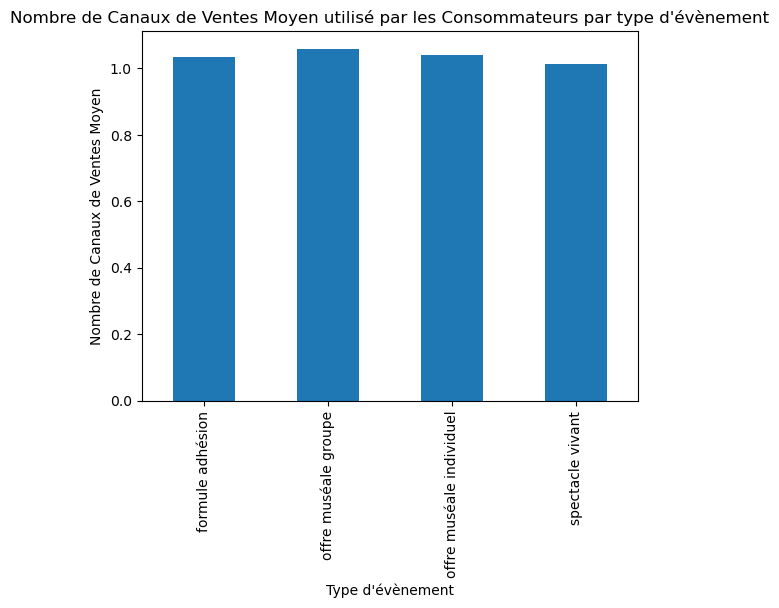

In [79]:
# Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement

avg_supp_event = customer.groupby('name_event_types')['nb_suppliers'].mean()
avg_supp_event.plot(kind='bar')
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de Canaux de Ventes Moyen')
plt.title("Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement")
plt.show()

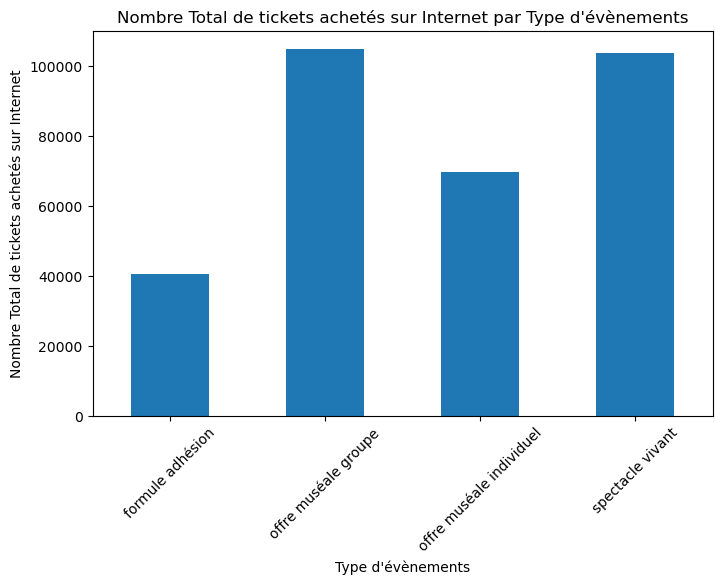

In [80]:
# Nombre Total de tickets achetés sur Internet par Type d'évènements

nb_tickets_internet = customer.groupby('name_event_types')['nb_tickets_internet'].sum()
nb_tickets_internet.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés sur Internet')
plt.title("Nombre Total de tickets achetés sur Internet par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

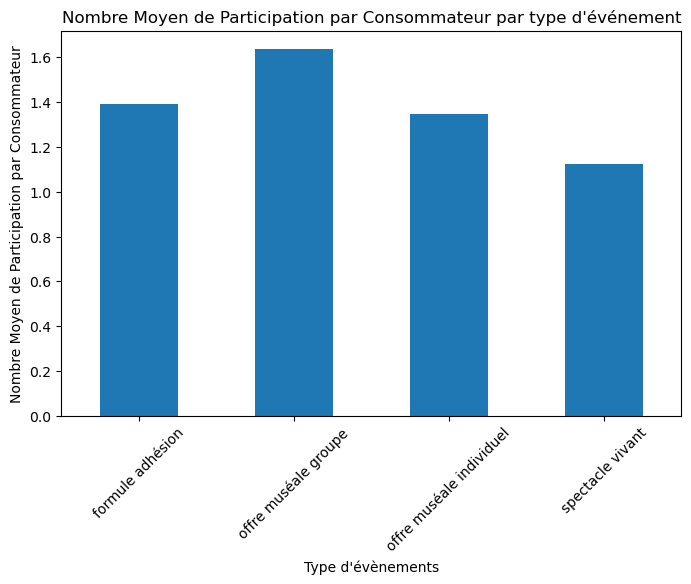

In [81]:
# Nombre moyen de participation par consommateur par type d'événement

participation = customer.groupby('name_event_types')['nb_purchases'].mean()
participation.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Moyen de Participation par Consommateur')
plt.title("Nombre Moyen de Participation par Consommateur par type d'événement")
plt.xticks(rotation=45)
plt.show()

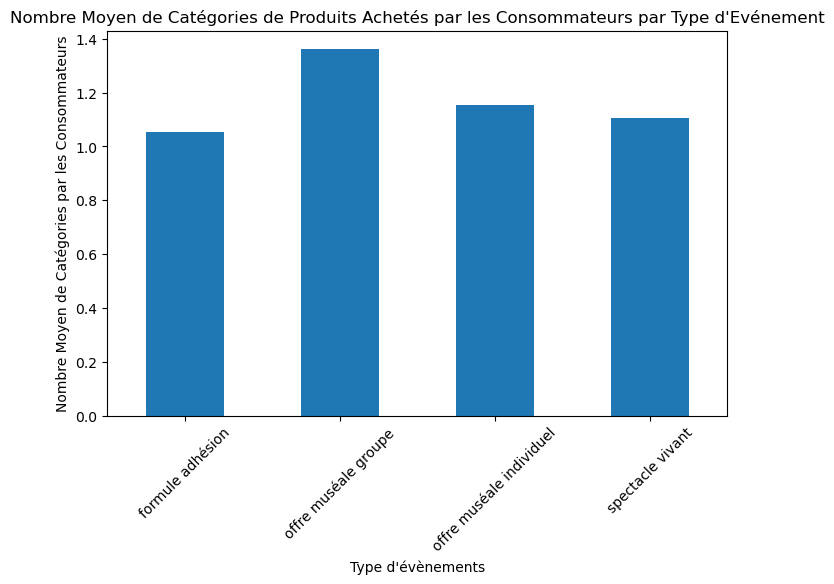

In [82]:
# Nombre Moyen de Catégories de Produits Achetés par les Consommateurs par Type d'Evénement

cat = customer.groupby('name_event_types')['nb_categories'].mean()
cat.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Moyen de Catégories par les Consommateurs')
plt.title("Nombre Moyen de Catégories de Produits Achetés par les Consommateurs par Type d'Evénement")
plt.xticks(rotation=45)
plt.show()

# 3 - Caractéristiques Démographiques (peu exploitable)

In [83]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'nb_purchases', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet',
       'name_event_types', 'avg_amount', 'nb_categories', 'nb_campaigns',
       'nb_campaigns_opened', 'time_to_open'],
      dtype='object')

In [84]:
def percent_of_na(df, column):
    na_percentage = df[column].isna().mean() * 100
    non_na_percentage = 100 - na_percentage
    
    labels = ['Valeurs Manquantes', 'Non-Valeurs Manquantes']
    sizes = [na_percentage, non_na_percentage]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title('Pourcentage de Valeurs Manquantes : {}'.format(column))
    plt.show()

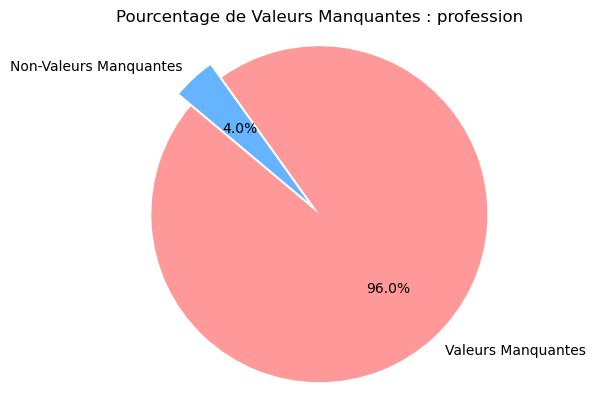

In [85]:
percent_of_na(customer, 'profession')

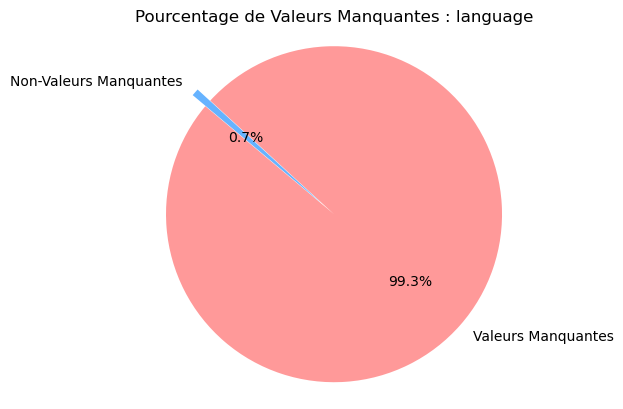

In [86]:
percent_of_na(customer, 'language')

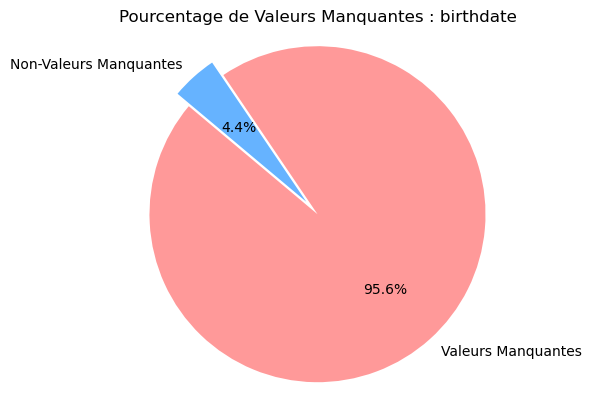

In [87]:
percent_of_na(customer, 'birthdate')